# Decision Trees and its Algorithms

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
import sklearn

### Data set

In [76]:
loan_default = pd.DataFrame(pd.read_csv('~\\OneDrive\\Documentos\\stat_learning\\Classification\\Dados\\Loan_default.csv')).drop('LoanID', axis=1)
loan_default

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [66]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

Lets check if there is any missing observation.

In [67]:
loan_default.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [128]:
len(loan_default)

255347

In [129]:
loan_default.groupby('Default')['Default'].count().transform(lambda x: x/len(loan_default))


Default
0    0.883872
1    0.116128
Name: Default, dtype: float64

In the original data set, we only have 11.61% of deafult client, so if we classifies all the clients as no default, we are going to have a accuracy score equal to 88.39%. Thus, this data base is unbalanced.

## Data set treatment

For the decision tree model, one hot encoding is not the best option to deal with categorical feature, due to sparsity in the tree, causing more prediciton error. On the other hand, I didn't find a way to deal categorical values. Hence, I'm going to use the one hot encoder and label encoder to fit the model.

In [77]:
loan_default['EducationFactor'] = loan_default['Education'].transform(lambda x: 0 if x == 'High School' else (1 if x == "Bachelor's" else (2 if x == "Master's" else 3)))

loan_default.drop('Education', axis=1, inplace=True)

loan_default['HasMortgage'] = loan_default['HasMortgage'].transform(lambda x: 1 if x == "Yes" else 0)
loan_default['HasDependents'] = loan_default['HasDependents'].transform(lambda x: 1 if x == "Yes" else 0)
loan_default['HasCoSigner'] = loan_default['HasCoSigner'].transform(lambda x: 1 if x == "Yes" else 0)

loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Age              255347 non-null  int64  
 1   Income           255347 non-null  int64  
 2   LoanAmount       255347 non-null  int64  
 3   CreditScore      255347 non-null  int64  
 4   MonthsEmployed   255347 non-null  int64  
 5   NumCreditLines   255347 non-null  int64  
 6   InterestRate     255347 non-null  float64
 7   LoanTerm         255347 non-null  int64  
 8   DTIRatio         255347 non-null  float64
 9   EmploymentType   255347 non-null  object 
 10  MaritalStatus    255347 non-null  object 
 11  HasMortgage      255347 non-null  int64  
 12  HasDependents    255347 non-null  int64  
 13  LoanPurpose      255347 non-null  object 
 14  HasCoSigner      255347 non-null  int64  
 15  Default          255347 non-null  int64  
 16  EducationFactor  255347 non-null  int6

In [78]:
for col in loan_default.columns:
    if loan_default[col].dtype == 'object':
        loan_default = pd.concat([loan_default, pd.get_dummies(loan_default[col])], axis=1)
        loan_default.drop(col, axis=1, inplace=True)

In [80]:
loan_default.drop('Unemployed', axis=1, inplace=True)
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Age              255347 non-null  int64  
 1   Income           255347 non-null  int64  
 2   LoanAmount       255347 non-null  int64  
 3   CreditScore      255347 non-null  int64  
 4   MonthsEmployed   255347 non-null  int64  
 5   NumCreditLines   255347 non-null  int64  
 6   InterestRate     255347 non-null  float64
 7   LoanTerm         255347 non-null  int64  
 8   DTIRatio         255347 non-null  float64
 9   HasMortgage      255347 non-null  int64  
 10  HasDependents    255347 non-null  int64  
 11  HasCoSigner      255347 non-null  int64  
 12  Default          255347 non-null  int64  
 13  EducationFactor  255347 non-null  int64  
 14  Full-time        255347 non-null  uint8  
 15  Part-time        255347 non-null  uint8  
 16  Self-employed    255347 non-null  uint

## Decision Tree


Lets find out the best depth for the data, considering the cross validation method and calculationg accuracies, precision and recall means for each depth.

In [83]:
best_depth = []

for depth in range(1, 10, 1):

    train_accuracy = 0
    test_accuracy = 0
    precision = 0
    recall = 0

    for j in range(0, 30, 1):
        train_X, test_X, train_Y, test_Y = train_test_split(loan_default.drop('Default', axis=1), loan_default['Default'], test_size=0.2) 
        tree_model  = tree.DecisionTreeClassifier(max_depth=depth,ccp_alpha=0)
        tree_model = tree_model.fit(train_X, train_Y)
        tree_fitted = tree_model.predict(train_X)
        tree_predict = tree_model.predict(test_X)
        train_accuracy += metrics.accuracy_score(train_Y, tree_fitted)
        test_accuracy += metrics.accuracy_score(test_Y, tree_predict)
        precision += metrics.precision_score(test_Y, tree_predict)
        recall += metrics.recall_score(test_Y, tree_predict)
    
    best_depth.append([depth, train_accuracy/j, test_accuracy/j, precision/j, recall/j])


c:\Users\kioia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\kioia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\kioia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\kioia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no

In [84]:
pd.DataFrame(best_depth).rename(columns={0: 'Depth', 1: 'Train Accuracy', 2: 'Test Accuracy', 3: 'Precision', 4: 'Recall'})

,Depth,Train Accuracy,Test Accuracy,Precision,Recall
0,1,0.914389,0.914194,0.000000,0.000000
1,2,0.914406,0.914127,0.000000,0.000000
2,3,0.914331,0.914426,0.000000,0.000000
3,4,0.914450,0.914581,0.343050,0.030672
4,5,0.915295,0.915708,0.621542,0.022336
5,6,0.915992,0.915284,0.584147,0.039612
6,7,0.916418,0.915463,0.579343,0.039073
7,8,0.917439,0.915012,0.537200,0.049708
8,9,0.919238,0.913196,0.483461,0.058300


The result of the recall score was not desireable, since approximately 5% of the defaulted clients were classifies as default. In addition to that, precision score indicates that 50% to 60% of the predicted positive (default) was indeed positive.

[Text(0.5431034482758621, 0.9, 'x[1] <= -1.447\ngini = 0.496\nsamples = 1759\nvalue = [954, 805]'),
 Text(0.27586206896551724, 0.7, 'x[0] <= 0.208\ngini = 0.085\nsamples = 966\nvalue = [923, 43]'),
 Text(0.13793103448275862, 0.5, 'x[1] <= -1.875\ngini = 0.499\nsamples = 58\nvalue = [28, 30]'),
 Text(0.06896551724137931, 0.3, 'x[0] <= 0.184\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.20689655172413793, 0.3, 'x[0] <= 0.173\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.41379310344827586, 0.5, 'x[1] <= -1.715\ngini = 0.028\nsamples = 908\nvalue = [895, 13]'),
 Text(0.3448275862068966, 0.3, 'x[0] <= 0.248\ngini = 0.012\nsamples = 854\nvalue = [849, 5]'),
 Text(

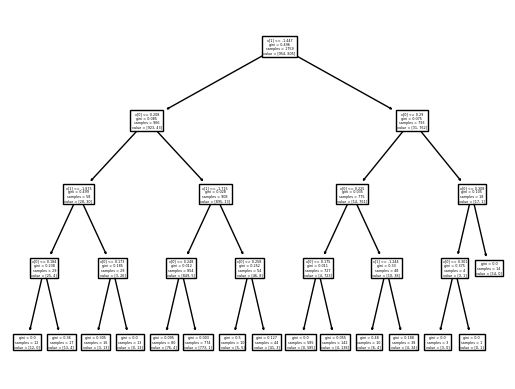

In [97]:
train_X, test_X, train_Y, test_Y = train_test_split(digitos_final[['Intensidade', 'Simetria']], digitos_final['Digito'], test_size=0.2) 
final_tree_model = tree.DecisionTreeClassifier(max_depth=4)
final_tree_model = final_tree_model.fit(train_X, train_Y)
tree.plot_tree(final_tree_model)

## Random Forest